Los datos publicados comienzan a partir de la fila 5. Además, la columna 5 está vacía, y las últimas filas hay que eliminarlas porque son una nota al pie.

In [141]:
import pandas as pd
import numpy as np
from collections import Counter
from itertools import chain
import math
import matplotlib.pyplot as plt
serie_mensual = './datos/serie_mensual_indices_comex.xls'
Intercambio_comercial = "./datos/Serie Intercambio comercial.csv"
pedido_Mines_x = './Datos/Envio_InformeEXPO_202112.xls'
pedido_Mines_m ='./Datos/Envio_InformeIMPO_202112.xls'

desde = 2011
hasta = 2021

df = pd.read_excel(serie_mensual, header=None, skiprows = 5)
df= df.rename(columns = {0:'Año', 1: 'Mes', 2:'iv_x', 3:'ip_x', 4:'iq_x', 5:'del',6:'iv_m',7:'ip_m',8:'iq_m'})
df = df.drop(columns="del")
df = df[df['Mes'].notna()]
df


,Año,Mes,iv_x,ip_x,iq_x,iv_m,ip_m,iq_m
0,2004,Enero,80.603953,97.863194,82.338631,85.999816,94.747514,90.765480
1,NaN,Febrero,83.123100,98.637791,84.271048,72.909655,95.365049,76.453102
2,NaN,Marzo,92.234875,98.699014,93.490321,90.356176,96.687437,93.481418
3,NaN,Abril,105.498772,101.221201,104.331206,88.261413,97.878611,90.232000
4,NaN,Mayo,117.807332,104.373216,113.006773,95.814740,99.755942,96.115957
...,...,...,...,...,...,...,...,...
211,NaN,Agosto,281.082321,188.625264,149.016264,307.609099,136.040804,226.115319
212,NaN,Septiembre,262.137604,189.164260,138.576708,314.682965,132.452925,237.383000
213,NaN,Octubre,238.175253,193.338718,123.190665,280.534623,132.264843,212.100674
214,NaN,Noviembre,213.978974,188.487150,112.165872,308.250830,134.263976,229.640959


In [142]:
#Más fácil para trabajar, lo hago todo lista
mes = df.Mes.tolist()
iv_x = df.iv_x.tolist()
ip_x = df.ip_x.tolist()
iq_x = df.iq_x.tolist()
iv_m = df.iv_m.tolist()
ip_m = df.ip_m.tolist()
iq_m = df.iq_m.tolist()
año = df.Año.tolist()

In [143]:
#Agarro los primeros 3 caracteres y los convierto en minúscula
mes_in=[]
for i in mes:
    mes_in.append(i[:3].lower())

#Reemplazo el mes original
mes = mes_in[:]
mes[:2]

['ene', 'feb']

La columna año: los primeros 12 meses corresponde al 2004, los siguientes 12 al 2004+1. Para hasta que de el largo de los meses publicados.

In [144]:
años=[]
arranque = int(df['Año'][0])
for i in range(len(mes)):
    if ((i % 12 == 0) and (i != 0)):       
        arranque+=1
        años.append(arranque)
    else:
        años.append(arranque)

años[:13]

[2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2005]

Calculo las medias por mes, hago listas y tengo que repetirlas dadas las observaciones.
Hay que tener en cuenta que están ordenadas por mes. La DF todavía no. 

Creo una df con el resto de las variables (falta ordenarlas)

In [145]:
mes_num=[]

nombre_meses = ['ene','feb','mar','abr','may','jun','jul','ago','sep','oct','nov','dic']

for i in mes:
    mes_num.append(nombre_meses.index(i)+1)
mes_num[:13]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1]

In [146]:
df_todo = pd.DataFrame()
df_todo['Mes_num']=mes_num
df_todo['Mes']=mes
df_todo['Año']=años
df_todo['iv_x']=iv_x
df_todo['ip_x']=ip_x
df_todo['iq_x']=iq_x
df_todo['iv_m']=iv_m
df_todo['ip_m']=ip_m
df_todo['iq_m']=iq_m

df_todo = df_todo.loc[(df_todo['Año'] >= desde) & (df_todo['Año'] <= hasta)]
df_todo

,Mes_num,Mes,Año,iv_x,ip_x,iq_x,iv_m,ip_m,iq_m
84,1,ene,2011,179.957085,180.058997,99.960269,261.393391,128.478584,203.529010
85,2,feb,2011,187.346074,184.026354,101.901966,254.715083,131.104370,194.440912
86,3,mar,2011,211.643514,190.789107,111.037765,301.618486,136.327393,221.530079
87,4,abr,2011,244.432906,187.680033,130.277500,295.807503,135.844623,218.175219
88,5,may,2011,275.321804,190.600870,144.443923,346.968350,141.647829,245.371752
...,...,...,...,...,...,...,...,...,...
211,8,ago,2021,281.082321,188.625264,149.016264,307.609099,136.040804,226.115319
212,9,sep,2021,262.137604,189.164260,138.576708,314.682965,132.452925,237.383000
213,10,oct,2021,238.175253,193.338718,123.190665,280.534623,132.264843,212.100674
214,11,nov,2021,213.978974,188.487150,112.165872,308.250830,134.263976,229.640959


In [147]:
#se agregan columnas con la variacion interanual

df_todo['iv_x_var']=df_todo['iv_x'].pct_change(periods=12, fill_method='bfill')
df_todo['ip_x_var']=df_todo['ip_x'].pct_change(periods=12, fill_method='bfill')
df_todo['iq_x_var']=df_todo['iq_x'].pct_change(periods=12, fill_method='bfill')
df_todo['iv_m_var']=df_todo['iv_m'].pct_change(periods=12, fill_method='bfill')
df_todo['ip_m_var']=df_todo['ip_m'].pct_change(periods=12, fill_method='bfill')
df_todo['iq_m_var']=df_todo['iq_m'].pct_change(periods=12, fill_method='bfill')

In [148]:
medias = df_todo.groupby(['Mes_num']).mean()
v_expo_media = medias.iv_x.tolist()
p_expo_media = medias.ip_x.tolist()
q_expo_media = medias.iq_x.tolist()
iv_impo_media = medias.iv_m.tolist()
p_impo_media = medias.ip_m.tolist()
q_impo_media = medias.iq_m.tolist()

del medias['Año']
medias

,iv_x,ip_x,iq_x,iv_m,ip_m,iq_m,iv_x_var,ip_x_var,iq_x_var,iv_m_var,ip_m_var,iq_m_var
Mes_num,,,,,,,,,,,,
1,161.217243,167.764151,96.463518,249.936111,121.775996,204.603539,-0.000597,-0.004421,0.006716,-0.009676,-0.011922,0.000391
2,160.195296,168.409847,95.239274,236.197004,124.644191,188.939833,-0.006683,-0.003797,0.000958,-0.010430,-0.011800,0.002325
3,181.086349,169.927230,106.497208,268.759966,126.556697,212.538446,0.003447,-0.006537,0.008215,0.024186,-0.010130,0.033421
4,198.580652,169.630997,116.570213,264.041480,127.486983,206.928746,-0.001588,0.001980,-0.006164,0.018617,-0.006568,0.021450
5,220.116870,170.096289,128.986749,294.643682,128.811303,227.860691,0.000525,0.007437,-0.001244,0.009195,-0.006272,0.006366
6,214.563032,171.650151,124.379578,295.121263,130.157912,225.810563,0.001530,0.005414,-0.004303,0.018176,-0.005790,0.012609
7,213.149122,170.142114,124.952094,306.935737,127.836527,238.967603,0.013219,0.006204,0.006499,0.012027,-0.003875,0.004337
8,218.947812,168.746114,128.836959,309.783215,126.259186,244.193231,0.017107,0.004679,0.004602,0.001399,0.002934,-0.012470
9,206.009437,169.124870,121.344590,288.361261,123.284191,233.204434,0.015908,0.005065,0.007413,0.000714,0.002310,-0.003119


In [149]:
cantidadMuestrasMes = Counter(df_todo['Mes'])
cantidadMuestrasMes

Counter({'ene': 11,
         'feb': 11,
         'mar': 11,
         'abr': 11,
         'may': 11,
         'jun': 11,
         'jul': 11,
         'ago': 11,
         'sep': 11,
         'oct': 11,
         'nov': 11,
         'dic': 11})

In [150]:
#Crear una variable que repita 12 veces cada mes. 
def lista_append_media(variable):
    lista = []
    for i in range(12):
        media = [variable[i]]*list(cantidadMuestrasMes.values())[i]
        lista.append(media)
    
    lista = list(chain(*lista))

    return lista

In [151]:
iv_expo_media_final = lista_append_media(v_expo_media)
p_expo_media_final = lista_append_media(p_expo_media)
q_expo_media_final = lista_append_media(q_expo_media)
iv_impo_media_final = lista_append_media(iv_impo_media)
p_impo_media_final = lista_append_media(p_impo_media)
q_impo_media_final = lista_append_media(q_impo_media)


In [152]:
df_todo_ordered=df_todo.sort_values(['Mes_num', 'Año'])
df_todo_ordered


,Mes_num,Mes,Año,iv_x,ip_x,iq_x,iv_m,ip_m,iq_m,iv_x_var,ip_x_var,iq_x_var,iv_m_var,ip_m_var,iq_m_var
84,1,ene,2011,179.957085,180.058997,99.960269,261.393391,128.478584,203.529010,NaN,NaN,NaN,NaN,NaN,NaN
96,1,ene,2012,187.389797,185.584809,101.043017,286.764183,127.729637,224.349729,0.041303,0.030689,0.010832,0.097060,-0.005829,0.102299
108,1,ene,2013,186.825815,196.537050,95.062722,286.468703,135.467855,211.311617,-0.003010,0.059015,-0.059186,-0.001030,0.060583,-0.058115
120,1,ene,2014,148.380390,188.920499,78.458136,301.994578,138.896245,217.083287,-0.205782,-0.038754,-0.174670,0.054197,0.025308,0.027314
132,1,ene,2015,131.745005,171.341014,76.781384,233.244842,127.088392,183.590507,-0.112113,-0.093052,-0.021371,-0.227652,-0.085012,-0.154285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,12,dic,2017,158.900611,158.509548,100.143845,286.880641,118.029568,242.571984,-0.015276,0.044343,-0.057938,0.167829,0.007565,0.158129
179,12,dic,2018,185.207845,152.453599,121.472761,209.409171,120.012585,174.433438,0.165558,-0.038206,0.212983,-0.270048,0.016801,-0.280900
191,12,dic,2019,186.512311,152.107463,121.946692,167.504137,114.317594,145.718613,0.007043,-0.002270,0.003902,-0.200111,-0.047453,-0.164618
203,12,dic,2020,122.999559,151.453786,81.222086,208.931639,109.513797,190.950524,-0.340528,-0.004297,-0.333954,0.247322,-0.042022,0.310406


In [153]:
df_todo_ordered['iv_x_media']= iv_expo_media_final
df_todo_ordered['ip_x_media']= p_expo_media_final
df_todo_ordered['iq_x_media']= q_expo_media_final
df_todo_ordered['iv_m_media']= iv_impo_media_final
df_todo_ordered['ip_m_media']= p_impo_media_final
df_todo_ordered['iq_m_media']= q_impo_media_final
df_todo_ordered = df_todo_ordered.reset_index(drop=True)
df_todo_ordered

,Mes_num,Mes,Año,iv_x,ip_x,iq_x,iv_m,ip_m,iq_m,iv_x_var,...,iq_x_var,iv_m_var,ip_m_var,iq_m_var,iv_x_media,ip_x_media,iq_x_media,iv_m_media,ip_m_media,iq_m_media
0,1,ene,2011,179.957085,180.058997,99.960269,261.393391,128.478584,203.529010,NaN,...,NaN,NaN,NaN,NaN,161.217243,167.764151,96.463518,249.936111,121.775996,204.603539
1,1,ene,2012,187.389797,185.584809,101.043017,286.764183,127.729637,224.349729,0.041303,...,0.010832,0.097060,-0.005829,0.102299,161.217243,167.764151,96.463518,249.936111,121.775996,204.603539
2,1,ene,2013,186.825815,196.537050,95.062722,286.468703,135.467855,211.311617,-0.003010,...,-0.059186,-0.001030,0.060583,-0.058115,161.217243,167.764151,96.463518,249.936111,121.775996,204.603539
3,1,ene,2014,148.380390,188.920499,78.458136,301.994578,138.896245,217.083287,-0.205782,...,-0.174670,0.054197,0.025308,0.027314,161.217243,167.764151,96.463518,249.936111,121.775996,204.603539
4,1,ene,2015,131.745005,171.341014,76.781384,233.244842,127.088392,183.590507,-0.112113,...,-0.021371,-0.227652,-0.085012,-0.154285,161.217243,167.764151,96.463518,249.936111,121.775996,204.603539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,12,dic,2017,158.900611,158.509548,100.143845,286.880641,118.029568,242.571984,-0.015276,...,-0.057938,0.167829,0.007565,0.158129,170.003817,165.470684,102.384858,248.383082,123.944217,199.605475
128,12,dic,2018,185.207845,152.453599,121.472761,209.409171,120.012585,174.433438,0.165558,...,0.212983,-0.270048,0.016801,-0.280900,170.003817,165.470684,102.384858,248.383082,123.944217,199.605475
129,12,dic,2019,186.512311,152.107463,121.946692,167.504137,114.317594,145.718613,0.007043,...,0.003902,-0.200111,-0.047453,-0.164618,170.003817,165.470684,102.384858,248.383082,123.944217,199.605475
130,12,dic,2020,122.999559,151.453786,81.222086,208.931639,109.513797,190.950524,-0.340528,...,-0.333954,0.247322,-0.042022,0.310406,170.003817,165.470684,102.384858,248.383082,123.944217,199.605475


#Sistema de consulta

In [154]:
mines_x = pd.read_excel(pedido_Mines_x, sheet_name= 'Desestacionalizada')
mines_m = pd.read_excel(pedido_Mines_m, sheet_name= 'Desestacionalizada')

df_consulta = pd.concat([mines_x, mines_m], axis= 1)
df_consulta.columns = ['Período','v_expo','quitar','v_impo']
df_consulta.drop('quitar', axis=1)

,Período,v_expo,v_impo
0,2009-01-01,4631.033727,3117.200048
1,2009-02-01,4694.879934,3119.074401
2,2009-03-01,4711.000702,3023.117090
3,2009-04-01,4645.905078,3034.565148
4,2009-05-01,4550.664542,2678.897558
...,...,...,...
151,2021-08-01,7555.918884,5248.732775
152,2021-09-01,7152.746142,5675.161814
153,2021-10-01,6723.780112,5344.966521
154,2021-11-01,6325.235753,6064.527418


In [155]:


v_expo_var =df_consulta.v_expo.pct_change(periods=12, fill_method='bfill')
v_impo_var =df_consulta.v_impo.pct_change(periods=12, fill_method='bfill')

df_consulta['v_expo_var']= v_expo_var
df_consulta['v_impo_var']= v_impo_var

#divido los valores por un millon porque nos manejamos por millones de dolares
#df_consulta.v_expo = [x/1000000 for x in df_consulta.v_expo]
#df_consulta.v_impo = [x/1000000  for x in df_consulta.v_impo]

df_consulta

,Período,v_expo,quitar,v_impo,v_expo_var,v_impo_var
0,2009-01-01,4631.033727,2009-01-01,3117.200048,NaN,NaN
1,2009-02-01,4694.879934,2009-02-01,3119.074401,NaN,NaN
2,2009-03-01,4711.000702,2009-03-01,3023.117090,NaN,NaN
3,2009-04-01,4645.905078,2009-04-01,3034.565148,NaN,NaN
4,2009-05-01,4550.664542,2009-05-01,2678.897558,NaN,NaN
...,...,...,...,...,...,...
151,2021-08-01,7555.918884,2021-08-01,5248.732775,0.627937,0.613875
152,2021-09-01,7152.746142,2021-09-01,5675.161814,0.610215,0.456931
153,2021-10-01,6723.780112,2021-10-01,5344.966521,0.490719,0.387513
154,2021-11-01,6325.235753,2021-11-01,6064.527418,0.356753,0.377256


In [156]:
mask = (df_consulta['Período'] >= f'{desde}-01-01') & (df_consulta['Período'] <= f'{hasta}-12-01')
df_consulta_fil = df_consulta.loc[mask]


mes_df_consulta_fil = list(map(lambda m: m.month, df_consulta_fil.Período))
anio_df_consulta_fil= list(map(lambda m: m.year, df_consulta_fil.Período))

df_consulta_fil['Año'] = anio_df_consulta_fil
df_consulta_fil['Mes'] = mes_df_consulta_fil

df_consulta_fil


C:\Users\Luca\AppData\Local\Temp/ipykernel_8492/906486968.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_consulta_fil['Año'] = anio_df_consulta_fil
C:\Users\Luca\AppData\Local\Temp/ipykernel_8492/906486968.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_consulta_fil['Mes'] = mes_df_consulta_fil


,Período,v_expo,quitar,v_impo,v_expo_var,v_impo_var,Año,Mes
24,2011-01-01,6613.214486,2011-01-01,5628.875818,0.179553,0.477371,2011,1
25,2011-02-01,6487.273881,2011-02-01,5781.930749,0.366896,0.350867,2011,2
26,2011-03-01,6721.603690,2011-03-01,5858.022603,0.302530,0.308906,2011,3
27,2011-04-01,6612.003631,2011-04-01,6110.999717,0.149240,0.381684,2011,4
28,2011-05-01,6931.195500,2011-05-01,6190.889309,0.208436,0.391416,2011,5
...,...,...,...,...,...,...,...,...
151,2021-08-01,7555.918884,2021-08-01,5248.732775,0.627937,0.613875,2021,8
152,2021-09-01,7152.746142,2021-09-01,5675.161814,0.610215,0.456931,2021,9
153,2021-10-01,6723.780112,2021-10-01,5344.966521,0.490719,0.387513,2021,10
154,2021-11-01,6325.235753,2021-11-01,6064.527418,0.356753,0.377256,2021,11


In [157]:
#Orden
df_consulta_ordered=df_consulta_fil.sort_values(['Mes', 'Año'])
df_consulta_ordered

,Período,v_expo,quitar,v_impo,v_expo_var,v_impo_var,Año,Mes
24,2011-01-01,6613.214486,2011-01-01,5628.875818,0.179553,0.477371,2011,1
36,2012-01-01,6742.609783,2012-01-01,6056.555076,0.019566,0.075980,2012,1
48,2013-01-01,6608.140406,2013-01-01,5924.492909,-0.019943,-0.021805,2013,1
60,2014-01-01,5250.295321,2014-01-01,6154.323646,-0.205481,0.038793,2014,1
72,2015-01-01,4698.088856,2015-01-01,4893.091342,-0.105176,-0.204934,2015,1
...,...,...,...,...,...,...,...,...
107,2017-12-01,4917.877073,2017-12-01,6397.839852,-0.014355,0.242658,2017,12
119,2018-12-01,5700.924188,2018-12-01,4535.344579,0.159225,-0.291113,2018,12
131,2019-12-01,5652.546830,2019-12-01,3531.738172,-0.008486,-0.221286,2019,12
143,2020-12-01,3678.353135,2020-12-01,4357.554125,-0.349257,0.233827,2020,12


In [158]:
#Para trabajar más facil
X = df_consulta_ordered.v_expo.tolist()
M = df_consulta_ordered.v_impo.tolist()

In [159]:
#Para poder dividir por 1 millón
def col_float(variable,lista):
    str(variable)
    for i in variable:
        replace = float(i.replace(',','.'))/1000000
        lista.append(replace)

In [160]:
#Calculo medias
medias = df_consulta_ordered.groupby(['Mes']).mean()
v_expo_mediaa = medias.v_expo.tolist()
v_impo_mediaa = medias.v_impo.tolist()
medias

,v_expo,v_impo,v_expo_var,v_impo_var,Año
Mes,,,,,
1,5663.998741,5204.876154,0.010125,0.032997,2016.0
2,5559.697689,5256.993069,0.029141,0.022144,2016.0
3,5595.228981,5150.053967,0.025175,0.043164,2016.0
4,5505.303636,5106.041929,0.016086,0.040863,2016.0
5,5591.975957,5142.357150,0.023172,0.038047,2016.0
6,5655.352913,5103.560775,0.029639,0.043138,2016.0
7,5694.353663,5203.092029,0.029533,0.043338,2016.0
8,5741.818529,5194.058182,0.046219,0.040282,2016.0
9,5654.102421,5167.917288,0.033879,0.030892,2016.0


In [161]:
def repite_en_lista(df, columna):
    lista = []
    for i, valor in enumerate(columna):
        for _ in range(list(Counter(df.Mes).values())[i]):
            lista.append(valor)
    return lista

In [162]:
v_expo_media = repite_en_lista(df_consulta_ordered, v_expo_mediaa)
v_impo_media = repite_en_lista(df_consulta_ordered, v_impo_mediaa)


In [163]:
df_consulta_ordered['v_expo_media']=v_expo_media
df_consulta_ordered['v_impo_media']=v_impo_media


In [164]:
df_consulta_wr=df_consulta_ordered[['v_expo', 'v_expo_media','v_impo', 'v_impo_media', 'v_expo_var','v_impo_var']]
df_consulta_wr = df_consulta_wr.reset_index(drop=True)
df_consulta_wr

,v_expo,v_expo_media,v_impo,v_impo_media,v_expo_var,v_impo_var
0,6613.214486,5663.998741,5628.875818,5204.876154,0.179553,0.477371
1,6742.609783,5663.998741,6056.555076,5204.876154,0.019566,0.075980
2,6608.140406,5663.998741,5924.492909,5204.876154,-0.019943,-0.021805
3,5250.295321,5663.998741,6154.323646,5204.876154,-0.205481,0.038793
4,4698.088856,5663.998741,4893.091342,5204.876154,-0.105176,-0.204934
...,...,...,...,...,...,...
127,4917.877073,5438.679910,6397.839852,5350.505210,-0.014355,0.242658
128,5700.924188,5438.679910,4535.344579,5350.505210,0.159225,-0.291113
129,5652.546830,5438.679910,3531.738172,5350.505210,-0.008486,-0.221286
130,3678.353135,5438.679910,4357.554125,5350.505210,-0.349257,0.233827


#Unión

In [165]:
df_estacional = pd.concat([df_todo_ordered, df_consulta_wr], axis=1)
#df_estacional = df_estacional.rename(columns={'ip_x': 'p_expo', 'iq_x': 'q_expo', 'ip_m': 'p_impo', 'iq_m': 'q_impo'})
df_estacional

,Mes_num,Mes,Año,iv_x,ip_x,iq_x,iv_m,ip_m,iq_m,iv_x_var,...,iq_x_media,iv_m_media,ip_m_media,iq_m_media,v_expo,v_expo_media,v_impo,v_impo_media,v_expo_var,v_impo_var
0,1,ene,2011,179.957085,180.058997,99.960269,261.393391,128.478584,203.529010,NaN,...,96.463518,249.936111,121.775996,204.603539,6613.214486,5663.998741,5628.875818,5204.876154,0.179553,0.477371
1,1,ene,2012,187.389797,185.584809,101.043017,286.764183,127.729637,224.349729,0.041303,...,96.463518,249.936111,121.775996,204.603539,6742.609783,5663.998741,6056.555076,5204.876154,0.019566,0.075980
2,1,ene,2013,186.825815,196.537050,95.062722,286.468703,135.467855,211.311617,-0.003010,...,96.463518,249.936111,121.775996,204.603539,6608.140406,5663.998741,5924.492909,5204.876154,-0.019943,-0.021805
3,1,ene,2014,148.380390,188.920499,78.458136,301.994578,138.896245,217.083287,-0.205782,...,96.463518,249.936111,121.775996,204.603539,5250.295321,5663.998741,6154.323646,5204.876154,-0.205481,0.038793
4,1,ene,2015,131.745005,171.341014,76.781384,233.244842,127.088392,183.590507,-0.112113,...,96.463518,249.936111,121.775996,204.603539,4698.088856,5663.998741,4893.091342,5204.876154,-0.105176,-0.204934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,12,dic,2017,158.900611,158.509548,100.143845,286.880641,118.029568,242.571984,-0.015276,...,102.384858,248.383082,123.944217,199.605475,4917.877073,5438.679910,6397.839852,5350.505210,-0.014355,0.242658
128,12,dic,2018,185.207845,152.453599,121.472761,209.409171,120.012585,174.433438,0.165558,...,102.384858,248.383082,123.944217,199.605475,5700.924188,5438.679910,4535.344579,5350.505210,0.159225,-0.291113
129,12,dic,2019,186.512311,152.107463,121.946692,167.504137,114.317594,145.718613,0.007043,...,102.384858,248.383082,123.944217,199.605475,5652.546830,5438.679910,3531.738172,5350.505210,-0.008486,-0.221286
130,12,dic,2020,122.999559,151.453786,81.222086,208.931639,109.513797,190.950524,-0.340528,...,102.384858,248.383082,123.944217,199.605475,3678.353135,5438.679910,4357.554125,5350.505210,-0.349257,0.233827


In [166]:
df_estacional.to_excel("./outputs/datosPedidoMines.xlsx",  engine='xlsxwriter', index=False)

In [167]:
def puntoyComa(a):
  return '{:,}'.format(a).replace(',','~').replace('.',',').replace('~','.')

In [168]:
#sacamos una lista con la cantidad acumulada de muestras por mes, mas adelante eso va a ser la posicion de los xticks
def acumula_muestras (distancias):
    distancias_acum = [0]
    for distancia in list(distancias.keys()):
        distancias_acum.append(distancias[distancia])
    distancias_acum = np.add.accumulate(distancias_acum).tolist()
    return distancias_acum

muestrasxMes_acum = acumula_muestras(cantidadMuestrasMes)

In [169]:
#Funcion que agrega NaN para correr las muestras horizontalmente
def corrimientoMuestras(datos, promedio):
  datos_corridos = segmenta(datos)
  meida_corrida = segmenta(promedio)
  for i in range(12):
    for x in range(muestrasxMes_acum[i]):
      datos_corridos[i].insert(x, None)
      meida_corrida[i].insert(x, None)
  return datos_corridos, meida_corrida

def segmenta(lista):
  #Separa las listas en una lista que contiene nuevas listas por mes
  listaMeses=[]

  for i in range(12):
    listaMeses.append(lista[muestrasxMes_acum[i]:muestrasxMes_acum[i+1]])
  
  return listaMeses

  #Extraemos solo los valores del 2021
def ultimoanio(datos):
  segmentado = segmenta(datos)
  ultianio = []
  for mes in segmentado:
    ultianio.append(mes[-1])
  return ultianio

In [170]:
def maxMinLista (val):
  segmentado = segmenta(val)
  extremosEstac = []
  for mes in segmentado:
    max_val = max(mes)
    max_idx = mes.index(max_val)
    min_val = min(mes)
    min_idx = mes.index(min_val)
    maxi = (max_val,max_idx)
    mini = (min_val,min_idx)
    media = sum(mes)/len(mes)

    #Cuartiles
    mes_sin_nan = []
    for v in mes:
      if(not math.isnan(v)):
        mes_sin_nan.append(v)
    qs = list(np.quantile(mes_sin_nan, [0.25, 0.5, 0.75]))
    q1s = qs[0]
    q2s = qs[1]
    q3s = qs[2]

    #Desviacion estandar
    std = np.std(mes_sin_nan)


    extremosEstac.append([maxi,mini,media,q1s,q2s,q3s,std])

  
  #Aca traspongo la matriz para que coincida con el formato de matplotlib
  extremosEstac = list(zip(*extremosEstac[::-1]))
  for i, ex in enumerate(extremosEstac):
    extremosEstac[i] = list(extremosEstac[i])
    extremosEstac[i].reverse()
  return extremosEstac



In [171]:
#determino el ancho de las columnas
col_width = []
muestrasxMes = list(cantidadMuestrasMes.values())
for muestra in muestrasxMes:
  col_width.append(muestra/sum(muestrasxMes))


In [172]:
#funcion que agrega los cuartiles
def agrega_cuartiles(tabla,lugar1,lugar2,lugar3):
    for q1 in tabla[3]:
        lugar1.append(puntoyComa(round(q1)))
    for q2 in tabla[4]:
        lugar2.append(puntoyComa(round(q2)))
    for q3 in tabla[5]:
        lugar3.append(puntoyComa(round(q3)))


def datosTabla(datos, vari, ultiAnio):
    anios = list(Counter(df_estacional.Año.to_list()).keys())
    tabla = maxMinLista(datos)
    
    #Pedido de MInes, que quede 1° 2021 / 2° Promedio / 3° Desvio / 4° Max /  5° Minimo / 6 variacion
    out = [[],[],[],[],[],[],[],[],[]]


    
    for max in tabla[0]:
        numeros = puntoyComa(round(max[0]))
        out[3].append(f'{numeros} ({anios[max[1]]})') #max en el 4to lugar
    for min in tabla[1]:
        numeros = puntoyComa(round(min[0]))
        out[4].append(f'{numeros} ({anios[min[1]]})')#min en el 5to lugar
    for prom in tabla[2]:
        if (math.isnan(prom)):
            prom = '--'
        else:
            numeros = puntoyComa(round(prom))
        out[1].append(str(numeros)) #prom en el 2do lugar
        
    #agregamos una fila con los valores del 2021
    for val in ultiAnio:
        if (math.isnan(val)):
            redondo = '--'
        else:
            redondo = puntoyComa(round(val))
        out[0].append(redondo) #2021 en el 1er lugar


    #agregamos los cuartiles
    agrega_cuartiles(tabla, out[6],out[7],out[8])


    #Agregamos desviacion estandar
    for sd in tabla[6]:
        out[2].append(puntoyComa(round(sd)))#desvio en el 3er lugar

    #agregamos variacion
    
    for n in acumula_muestras(cantidadMuestrasMes)[1:]:
      if np.isnan(vari[n-1]):
        out[5].append('--')
      else:
        vari_por_cien = vari[n-1]*100

        out[5].append(f'{puntoyComa(round(vari_por_cien,1))}%')
      
    return out

In [173]:
def hace_tabla (ax, datos, vari, col_width):
        
        lista_meses = list(cantidadMuestrasMes.keys())

        tabla = ax.table(
                datosTabla(datos, vari, ultimoanio(datos)),
                colLabels=lista_meses,
                #rowLabels=['Máx','Min','Prom','2021', 'Q1', 'Q2', 'Q3','Std'],
                rowLabels=['2021','Prom','Desvío', 'Máx', 'Min', 'Var Interanual','q1','q2','q3'],
                colWidths=col_width,
                bbox=[0, -0.28, 1, 0.275],
                )

        tabla.auto_set_font_size(False)
        tabla.set_fontsize(12)

        return tabla

In [174]:
class Grafo_Estacionalidad:
    def __init__(self, df, columna1: str, columna2: str, tituloax1: str, tituloax2: str):
        self.df = df
        self.columna1 = columna1
        self.columna2 = columna2
        self.tituloax1 = tituloax1
        self.tituloax2 = tituloax2
        self.width = 20
        self.length = 20
        self.fig = None
        self.colors = ['gold','blueviolet', 'blueviolet', 'gold']

    def set_size(self,w,l):
        self.width = w
        self.length = l

    def set_colors(self, colors):
        self.colors = colors

    def hacer_grafo(self):
        self.fig, ejes = plt.subplots(2)
        self.fig.set_size_inches(self.width,self.length)


        ax1 = ejes[0]
        ax2 = ejes[1]
        dat1= self.df[self.columna1].to_list()
        dat2= self.df[self.columna2].to_list()

        media_columna1 = f'{self.columna1}_media'
        media_columna2 = f'{self.columna2}_media'

        med1= self.df[media_columna1].to_list()
        med2= self.df[media_columna2].to_list()

        vari_columna1 = f'{self.columna1}_var'
        vari_columna2 = f'{self.columna2}_var'

        vari1 = self.df[vari_columna1].to_list()
        vari2 = self.df[vari_columna2].to_list()

        datos_corridos1, media_corrida1 = corrimientoMuestras(dat1, med1)
        datos_corridos2, media_corrida2 = corrimientoMuestras(dat2, med2)


        for i in range(12):
            ax1.plot(datos_corridos1[i], color = "gold")
            ax1.plot(media_corrida1[i], color = "blueviolet")
        
        for i in range(12):
            ax2.plot(datos_corridos2[i], color = "blueviolet")
            ax2.plot(media_corrida2[i], color = "gold")
        #dibujo lineas verticales por mes
        for muestras in muestrasxMes_acum:
            ax1.axvline(muestras, color='grey', linestyle='--' )
            ax2.axvline(muestras, color='grey', linestyle='--' )
            
        ax1.set_xmargin(0)
        ax2.set_xmargin(0)
        ax1.set_xticks([])
        ax2.set_xticks([])
        
        #agrega las tablas
        hace_tabla(ax1, dat1, vari1, col_width)
        hace_tabla(ax2, dat2, vari2, col_width)

        ejes[0].set_title(f'{self.tituloax1} del período Enero {desde} – Diciembre {hasta}', fontsize = 20)

        ejes[1].set_title(f'{self.tituloax2} del período Enero {desde} – Diciembre {hasta}', fontsize = 20)

        plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.5)


    def get_fig(self):
        return self.fig
    
    def debug(self):
        return self.df['v_expo_media']

    def show(self):
        plt.show(self.fig)

    def print(self, directorio):
        self.fig.savefig(directorio, transparent=False, dpi=300, bbox_inches = "tight")

        

In [175]:
grafo_valores = Grafo_Estacionalidad(
    df_estacional,
    'v_expo',
    'v_impo',
    tituloax1='Análisis de subseries mensuales para las exportaciones',
    tituloax2='Análisis de subseries mensuales para las importaciones'
    )

grafo_pyq_expo = Grafo_Estacionalidad(
    df_estacional,
    'ip_x',
    'iq_x',
    tituloax1='Índice precio expo - Estacionalidad',
    tituloax2='Índice cantidad expo - Estacionalidad'
    )

grafo_pyq_impo = Grafo_Estacionalidad(
    df_estacional,
    'ip_m',
    'iq_m',
    tituloax1='Índice precio impo - Estacionalidad',
    tituloax2='Índice cantidad impo - Estacionalidad'
    )

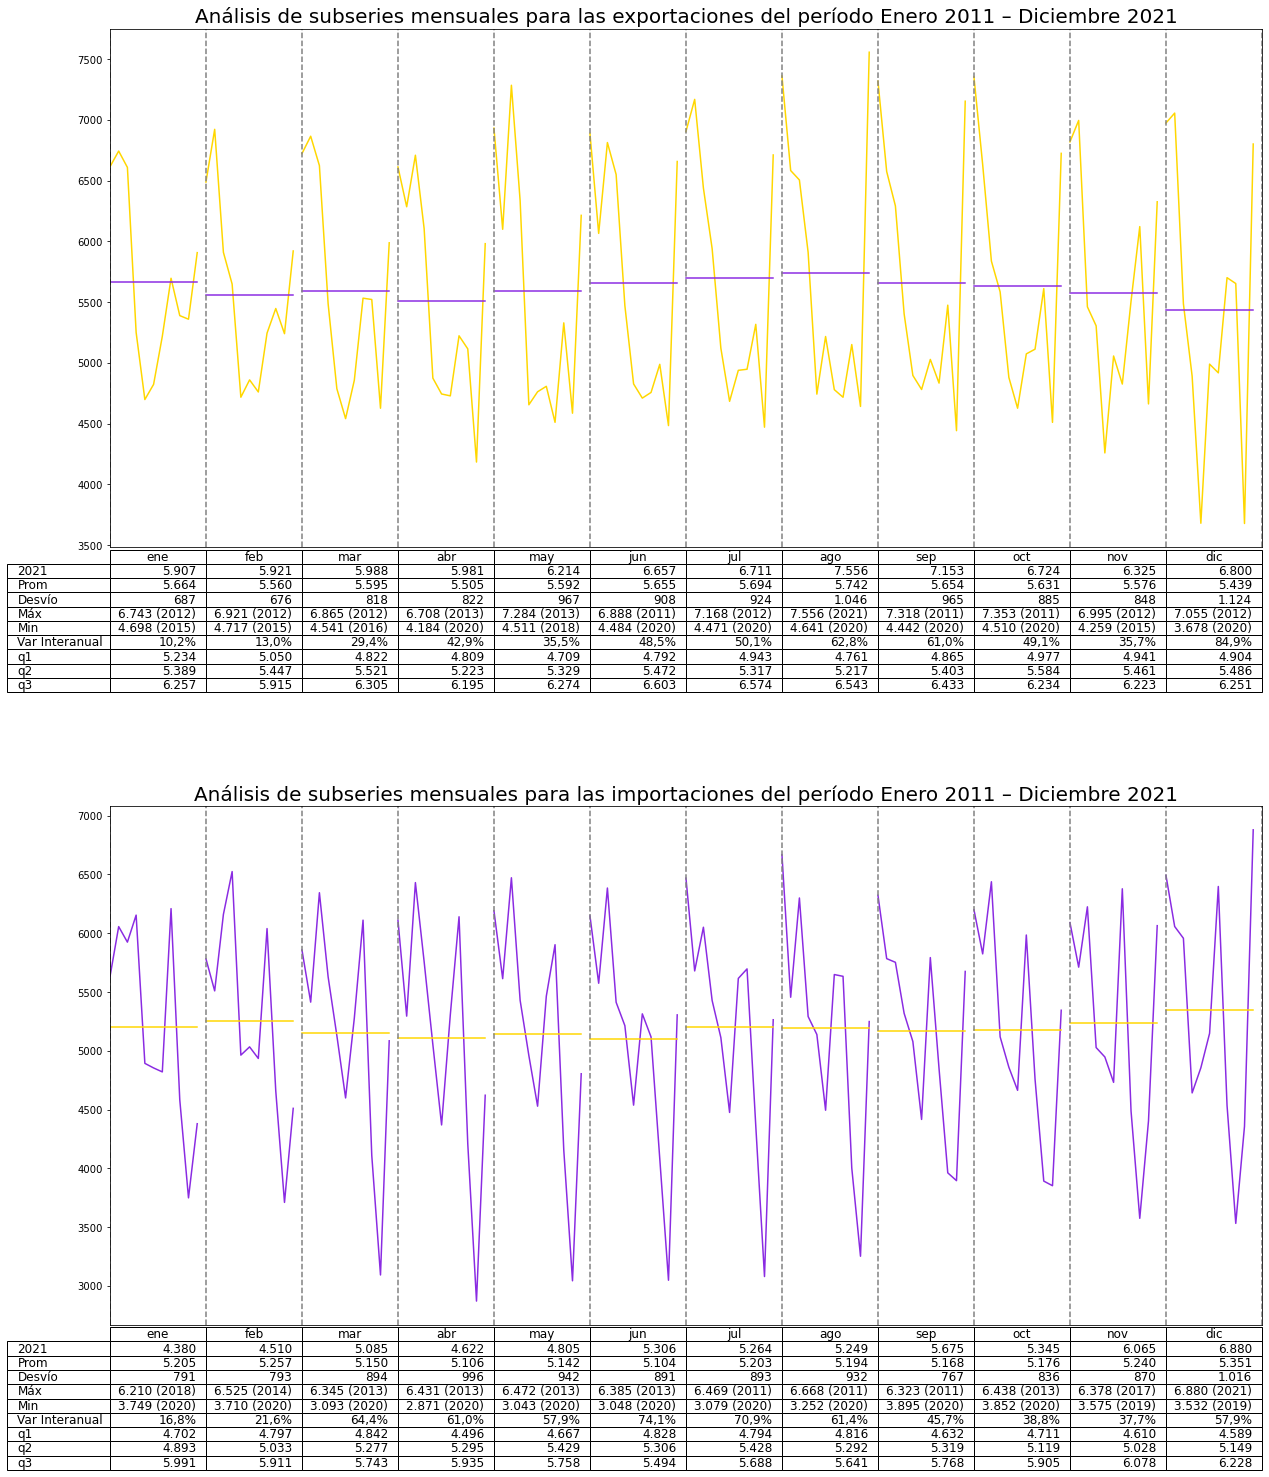

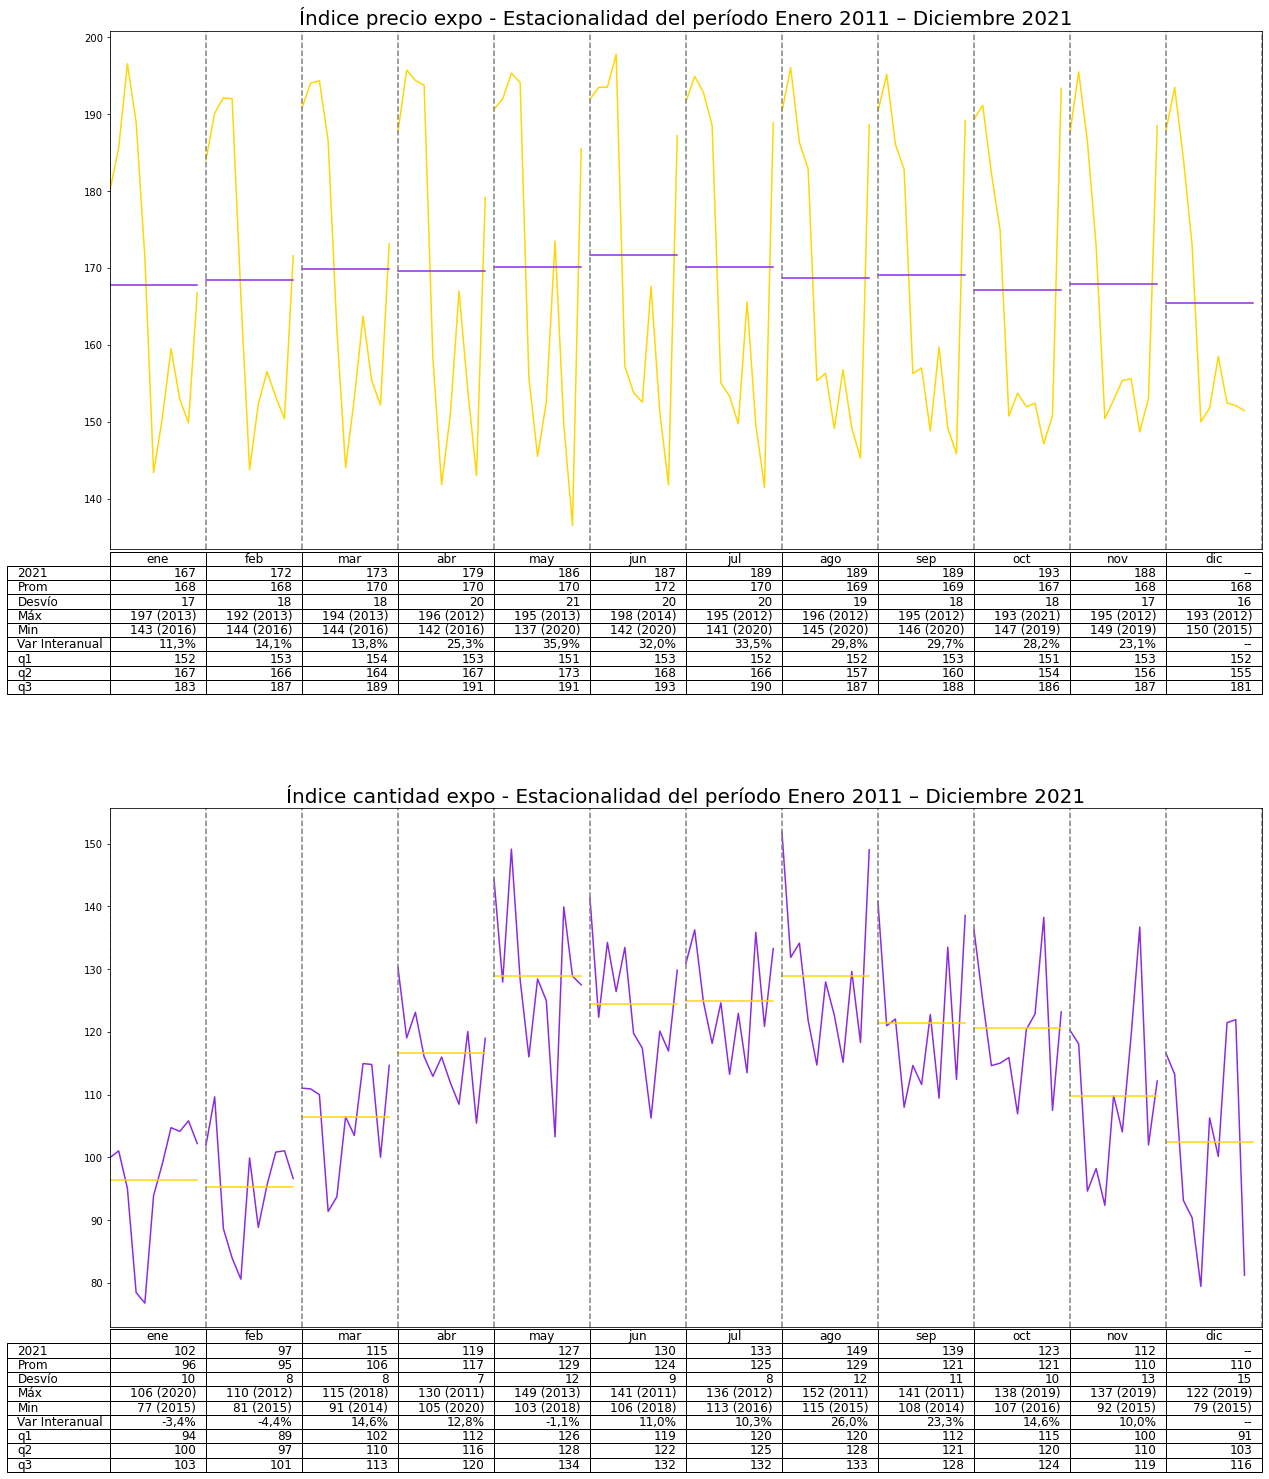

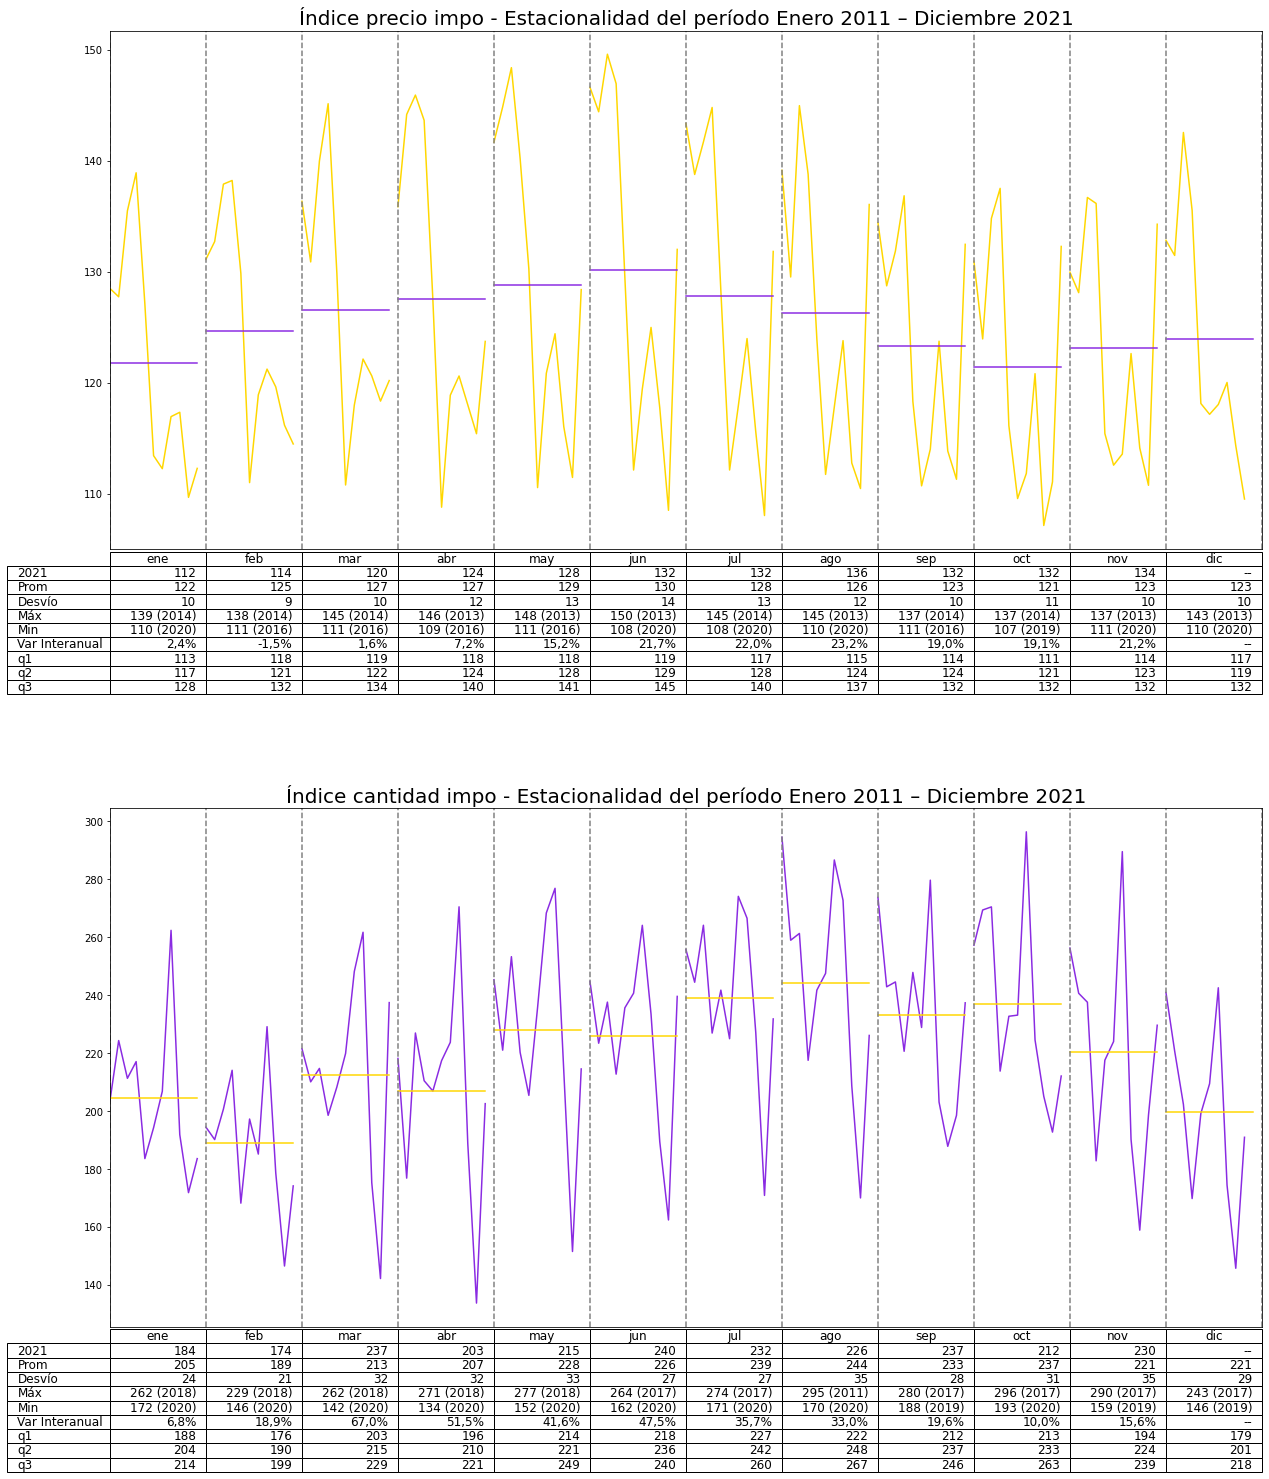

In [177]:
#Valores IMPO y EXPO
grafo_valores.hacer_grafo()

#Precios y cantidades expo
grafo_pyq_expo.hacer_grafo()

#precios y cantiades impo
grafo_pyq_impo.hacer_grafo()

#Imprime los resultados en pdf
grafo_valores.print('./outputs/pedidoMines.pdf')
#grafo_pyq_expo.print('./outputs/Estacionalidad de IPX-IQX.pdf')
#grafo_pyq_impo.print('./outputs/Estacionalidad de IPM-IQM.pdf')